#### Which city is having the highes sales

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [4]:
def get_city(address: str) -> str:
    return address.split(", ")[1]

def get_state(address: str) -> str:
    return address.split(", ")[2].split(" ")[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"""{get_city(x)} {get_state(x)}""")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [7]:
results = all_data.groupby('City').sum()
results

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,3423838407,16602,2779908.20,104794,2795498.58
Austin TX,2280982185,11153,1809873.61,69829,1819581.75
Boston MA,4598265261,22528,3637409.77,141112,3661642.01
Dallas TX,3415643578,16730,2752627.82,104620,2767975.40
Los Angeles CA,6811084693,33289,5421435.23,208325,5452570.80
New York City NY,5736333884,27932,4635370.83,175741,4664317.43
Portland ME,563266345,2750,447189.25,17144,449758.27
Portland OR,2305594747,11303,1860558.22,70621,1870732.34
San Francisco CA,10304443952,50239,8211461.74,315520,8262203.91


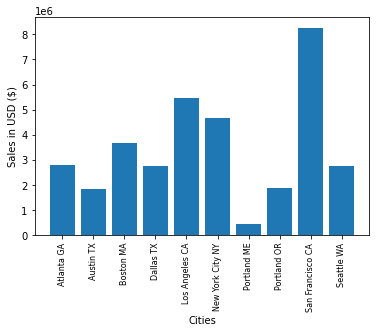

In [16]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

In [ ]:
all_data.to_csv("all_data.csv", Index)